In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_labels))

4423680/4422102 [==============================] - 2s 0us/step
(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


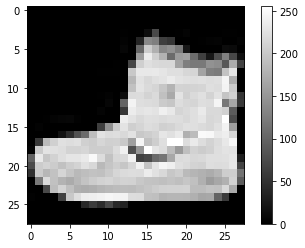

In [3]:
plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

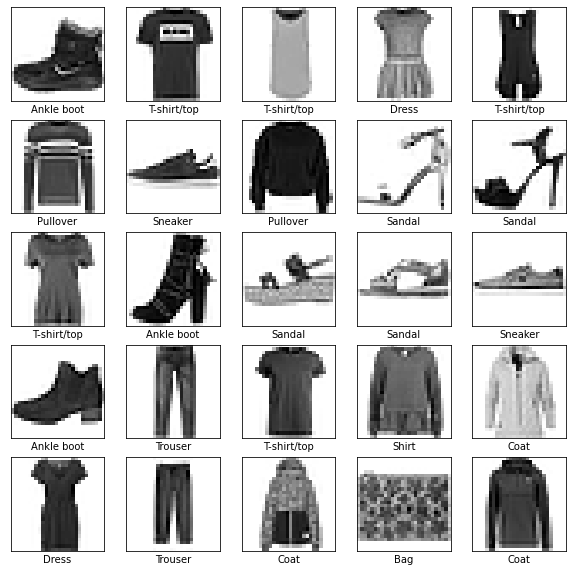

In [5]:
plt.figure(figsize=(10, 10)) # figure of size 10 * 10
for i in range(25): # to show 25 image 
    plt.subplot(5, 5, i+1) # column & row & the increasing
    plt.xticks([])
    plt.yticks([])
    plt.grid(False) # the lines that makes squares in image
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax) # should be equals to
# class_names
])

In [7]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [8]:
model.fit(train_images, train_labels, epochs=3) # fit train the model
# so we give it train images & train labels

# less epochs means Under Fitting, more epochs means Over Fitting

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6264 - accuracy: 0.7840
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3869 - accuracy: 0.8615
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3416 - accuracy: 0.8771


In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuracy:', test_acc)

313/313 [==============================] - 1s 988us/step - loss: 0.3957 - accuracy: 0.8615
Test Accuracy: 0.8615000247955322


In [10]:
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

# The prediction is 9 and correct answer is 9 from 'test_labels'

[4.2537667e-05 4.5732628e-07 4.3015639e-06 1.3286203e-05 2.9133330e-06
 6.1164394e-02 5.8828526e-05 1.4178540e-01 3.6276144e-04 7.9656512e-01]
9
9


In [25]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                   100*np.max(predictions_array),
                                   class_names[true_label]),
                                   color=color)

In [26]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

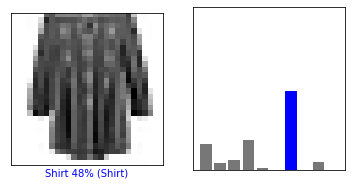

In [31]:
i = 512
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()